In [1]:
# Importar las librerias necesarias

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Cargo el conjunto de puntos en memoria
dataset__route = "data/isolation.csv"
dataset_df = pd.read_csv(dataset__route)

# 5 primeros registros dataset
dataset_df.head(5)

,x,y,color
0,257.431260,345.345735,0
1,317.520132,234.087272,2
2,227.093467,64.139227,0
3,148.855905,174.524528,1
4,419.977732,315.164370,0


In [3]:
# Normalizo los valores de las variables x e y antes de representar el datase
scaler = MinMaxScaler()

X = scaler.fit_transform(dataset_df[['x', 'y']])
X

array([[0.52781812, 0.93016444],
       [0.65587089, 0.60557847],
       [0.46316658, 0.10977123],
       [0.29643794, 0.43180983],
       [0.87421379, 0.84211318],
       [0.29492354, 0.41700145],
       [0.57078967, 0.48352575],
       [0.77125201, 0.52613336],
       [0.24544565, 0.43903651],
       [0.25770261, 0.44168576],
       [0.98073787, 0.22223546],
       [0.17207524, 0.87887963],
       [0.70374835, 0.57045142],
       [0.17012994, 0.4945488 ],
       [0.24064382, 0.4638034 ],
       [0.77061176, 0.51921279],
       [0.26548212, 0.43676327],
       [0.2820846 , 0.4134828 ],
       [0.59556713, 0.62526744],
       [0.19545139, 0.28734946],
       [0.47083827, 0.60157161],
       [0.42774983, 0.41301837],
       [0.48943037, 0.44911012],
       [0.38645406, 0.55340143],
       [0.3293389 , 0.41509892],
       [0.01449068, 0.23395174],
       [0.74762603, 0.54094414],
       [0.3594233 , 0.42460917],
       [0.62888745, 0.63476863],
       [0.52753698, 0.46566249],
       [0.

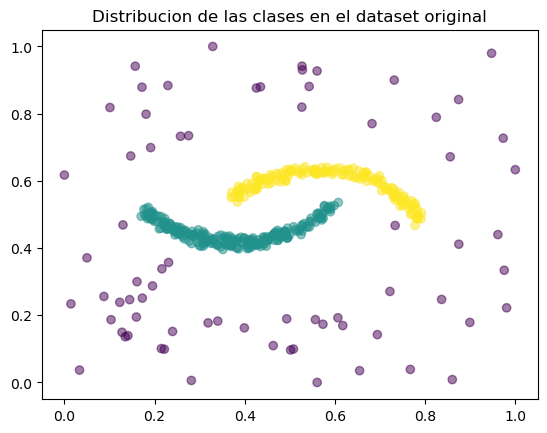

In [4]:
# Represento el conjunto de puntos en un eje bidimensional
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c = dataset_df['color'], alpha = 0.5)
plt.title('Distribucion de las clases en el dataset original')
plt.show()

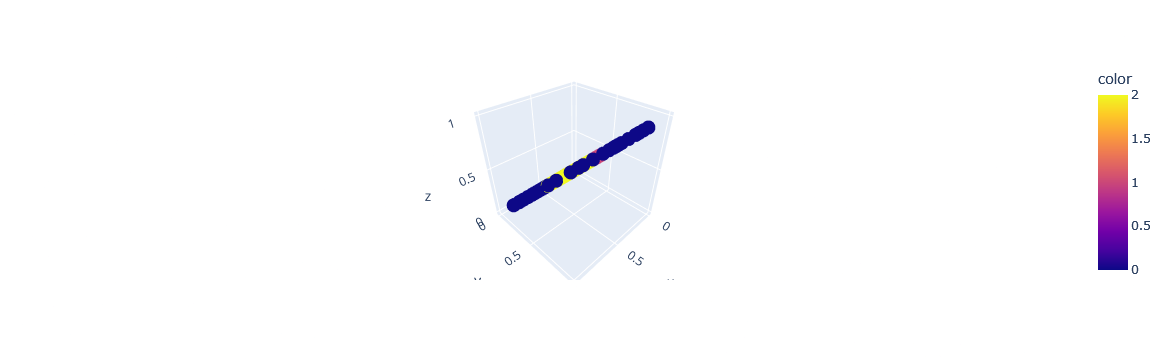

In [7]:
# Represento el conjunto de datos en un eje tridimensional
fig = px.scatter_3d(X, X[:, 0], X[:, 1], X[:, 1], color = dataset_df['color'])
fig.show()

In [9]:
## Instancio un objeto de la clase DBSCAN
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.040)

# Entreno el modelo
model.fit(X)

DBSCAN(eps=0.04)

In [10]:
# Defino una lista con las etiquetas que el modelo ha asigando a cada punto del dataset en el espacio de caracteristicas
labels = model.labels_
labels

array([-1,  0, -1,  1, -1,  1,  1,  0,  1,  1, -1, -1,  0,  1,  1,  0,  1,
        1,  0, -1,  0,  1,  1,  0,  1, -1,  0,  1,  0,  1,  1, -1,  1,  0,
        1,  1,  1,  0,  1,  1, -1,  0, -1, -1,  1,  0,  1,  0,  1,  0,  0,
        0,  1,  1,  0,  0,  1,  1,  0,  0,  1, -1, -1,  1,  1, -1,  0,  1,
       -1,  0,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  0,  1,  0,  1,
        1,  0,  1,  1,  1,  1, -1, -1,  0,  1,  0,  1,  0,  1,  1,  0,  0,
        1,  1,  1,  1,  1,  0,  0, -1,  1,  1,  0,  1,  1,  1, -1, -1,  0,
        1, -1, -1,  0,  1,  1,  0,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,
       -1,  1,  0,  0,  0,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        0,  1, -1, -1,  1,  0,  1,  1,  1, -1,  1,  0,  1,  1,  0,  0,  0,
        0,  1,  0,  1,  1,  0,  0,  1,  1,  1,  1,  1,  0,  1,  0, -1,  1,
        1,  0,  1,  0, -1,  1,  0,  1,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        0, -1,  0,  0,  1,  1,  0,  0,  0,  0,  0,  1,  0, -1,  1,  1, -1,
        0,  1,  0,  0,  1

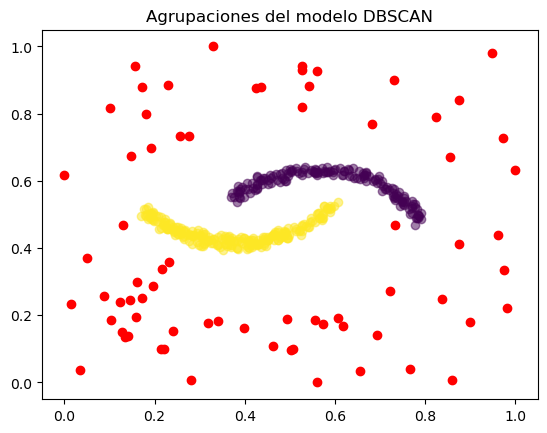

In [11]:
# Represento las agrupaciones del modelo DBSCAN en un eje bidimensional
plt.figure()

unique_labels = set([label for label in labels if label != -1])
cmap = plt.cm.viridis
colors = cmap(np.linspace(0, 1, len(unique_labels)))

for _ in range(len(unique_labels)):
    plt.scatter(X[labels == _][:, 0], X[labels == _][:, 1], c = [colors[_]], alpha = 0.5)
    
# Represento los puntos considerados anomalos por el modelo DBSCAN
plt.scatter(X[labels == -1][:, 0], X[labels == -1][:, 1], c = 'red')
plt.title("Agrupaciones del modelo DBSCAN")
plt.show()

Si bien es cierto que los puntos asociados como anomalos, en el dataset original se incluyen en una "unica clase", no es del todo incorrecto, ya que podemos obtener uina referencia a estos puntos bajo la clase asignada a los datos "anomalos", por lo que podemos referenciar a estos puntos como una clase mas.

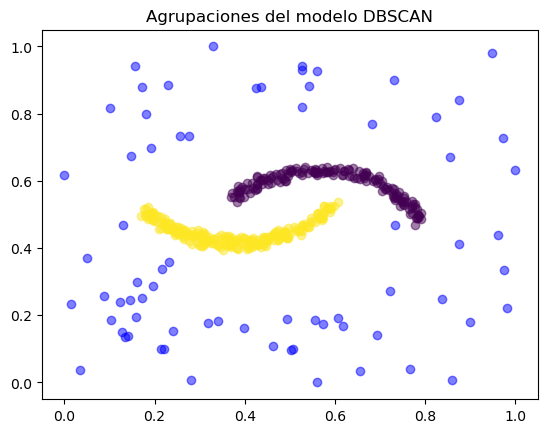

In [13]:
plt.figure()

unique_labels = set([label for label in labels if label != -1])
cmap = plt.cm.viridis
colors = cmap(np.linspace(0, 1, len(unique_labels)))

for _ in range(len(unique_labels)):
    plt.scatter(X[labels == _][:, 0], X[labels == _][:, 1], c = [colors[_]], alpha = 0.5)
    
# Represento los puntos considerados anomalos por el modelo DBSCAN
plt.scatter(X[labels == -1][:, 0], X[labels == -1][:, 1], c = 'blue', alpha = 0.5)
plt.title("Agrupaciones del modelo DBSCAN")
plt.show()